In [3]:
#Importing Libraries :
#The analysis will be done using the following libraries : 

#Pandas:  This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.
#Numpy: Numpy arrays are very fast and can perform large computations in a very short time.
#Matplotlib / Seaborn: This library is used to draw visualizations.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#  import the dataset using the pandas library

dataset = pd.read_csv("UberDataset.csv")
dataset.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
# To find the shape of the dataset :
dataset.shape # requires no paaramters

# To understand the data more deeply, we need to know about the null values count, datatype, etc.
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
# DATA PRE-PROCESSING :
# As we understood that there are a lot of null values in PURPOSE column, so for that we will me filling the null values with a NOT keyword.

dataset['PURPOSE'].fillna("NOT", inplace=True)


# Changing the START_DATE and END_DATE to the date_time format so that further it can be use to do analysis.

dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],
									errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],
									errors='coerce')

# It converts the 'START_DATE' column to datetime format, and the 'errors' parameter is set to 'coerce'.
# This means that any value in the 'START_DATE' column that cannot be passed as a datetime will be converted to 'NaT' (Not a Time), which is Pandas' way of representing missing or undefined date/time values.

# It is same for the 'END_DATE' column. 
# By converting these columns to datetime format, you can perform various operations on the dates, such as sorting them chronologically or calculating the duration between two dates.

In [7]:
# Splitting the START_DATE to date and time column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night

from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
							bins = [0,10,15,19,24],
							labels = ['Morning','Afternoon','Evening','Night'])


# The code you provided is using the Pandas library in Python to preprocess a dataset.
# Specifically, it is creating two new columns in the dataset DataFrame: date and time.

# The first line of code is using the pd.DatetimeIndex() method to extract the date component of the START_DATE column and assigning it to a new date column in the dataset.
# This creates a new column with only the date information from the START_DATE column.

# The second line of code is using the same pd.DatetimeIndex() method to extract the hour component of the START_DATE column and assigning it to a new time column in the dataset. 
# This creates a new column with only the hour information from the START_DATE column.

# The third line of code is using the pd.cut() method to create a new column day-night by categorizing the time column into four categories based on the hour of the day: morning (0-10), afternoon (11-15), evening (16-19), and night (20-24). 
# The labels argument assigns a label to each category. This creates a new column with the day-night category for each row in the dataset.

In [8]:
# Once we are done with creating new columns, we can now drop rows with null values.

dataset.dropna(inplace=True)


In [9]:
# It is also important to drop the duplicates rows from the dataset. To do that, refer the code below.

dataset.drop_duplicates(inplace=True)


In [10]:
# DATA VISUALISATION :
# In this section, we will try to understand and compare all columns.
# Let’s start with checking the unique values in dataset of the columns with object datatype.


obj = (dataset.dtypes == 'object')          

object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
    unique_values[col] = dataset[col].unique().size
unique_values


{'CATEGORY': 2, 'START': 175, 'STOP': 186, 'PURPOSE': 11, 'date': 291}

C:\Users\GAMING\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GAMING\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

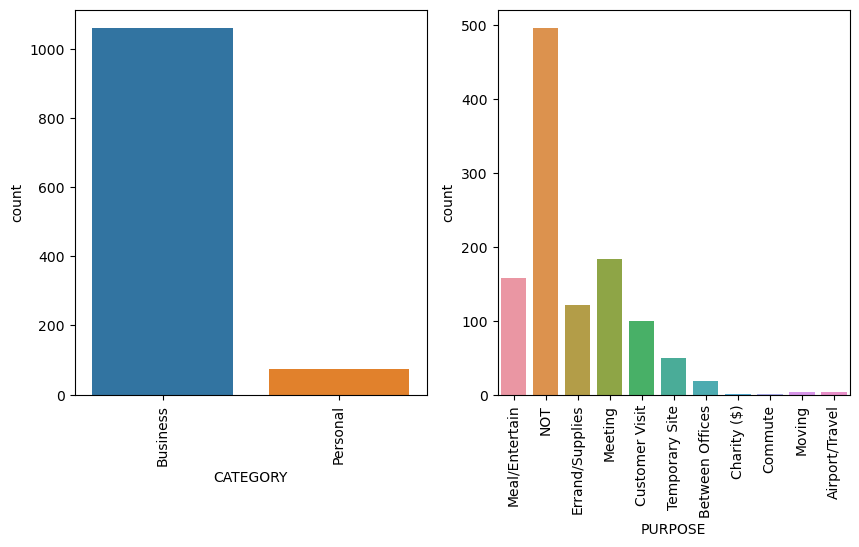

In [42]:
# Now, we will be using matplotlib and seaborn library for countplot the CATEGORY and PURPOSE columns.

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])
plt.xticks(rotation=90)


C:\Users\GAMING\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

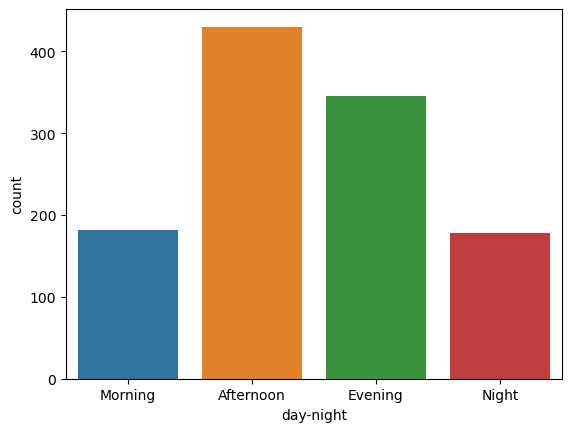

In [25]:
# Let’s do the same for time column, here we will be using the time column which we have extracted above.

sns.countplot(dataset ['day-night'])
plt.xticks()

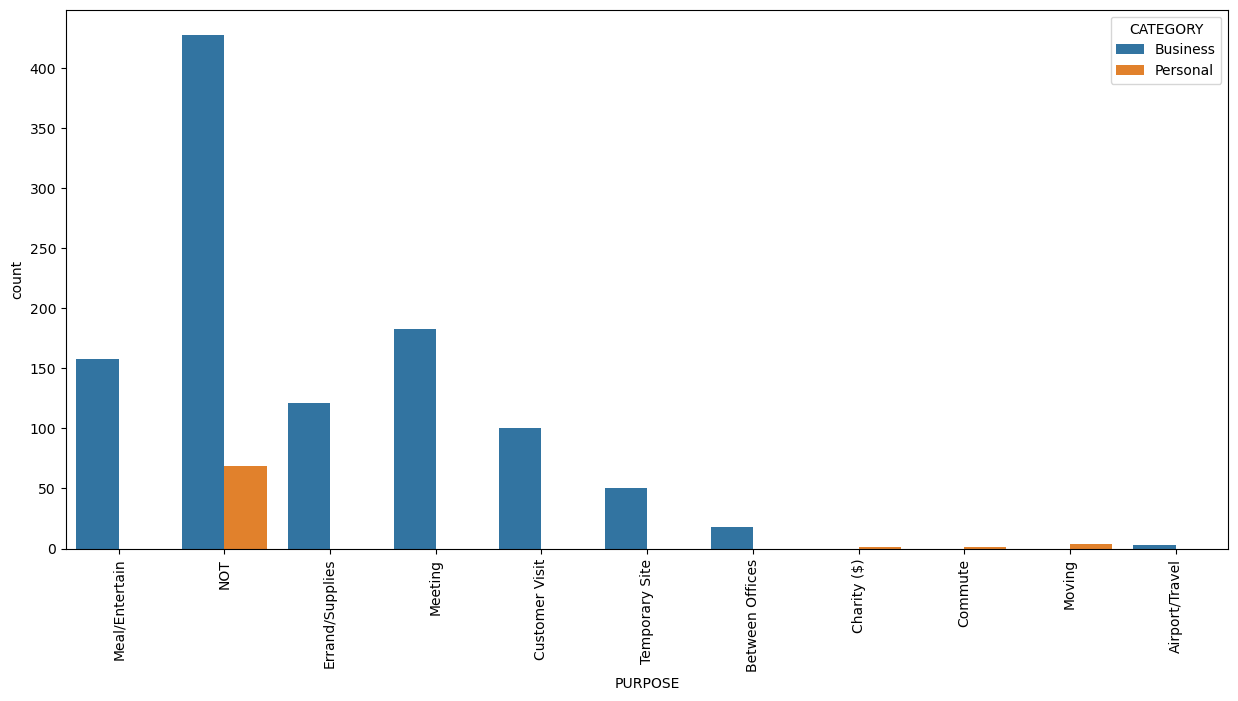

In [37]:
# Now, we will be comparing the two different categories along with the PURPOSE of the user.

plt.figure(figsize=(15, 7))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')

# The 'data' parameter specifies the dataset being used, 'dataset' in this case. 
# The 'x' parameter specifies the column in the dataset to plot, which is 'PURPOSE'.
# The 'hue' parameter specifies the column to group the data by and color the bars according to its unique values, which is 'CATEGORY'.

plt.xticks(rotation=90, size = 10)
plt.show()

